은행고객이탈 확률예측

In [2]:
# 컬럼 정보
# Customer ID: A unique identifier for each customer
# Surname: The customer's surname or last name
# Credit Score: A numerical value representing the customer's credit score
# Geography: The country where the customer resides (France, Spain or Germany)
# Gender: The customer's gender (Male or Female)
# Age: The customer's age.
# Tenure: The number of years the customer has been with the bank
# Balance: The customer's account balance
# NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
# HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
# IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
# EstimatedSalary: The estimated salary of the customer
# Exited: Whether the customer has churned (1 = yes, 0 = no)

In [2]:
# 1. 데이터 로딩 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_column', 30)
from numpy import nan as NA
churn = pd.read_csv('Churn_Modelling_v1.csv')
churn = churn.drop(['RowNumber'], axis = 1)
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
# 2. EDA
# 1) 결측치, 이상치 확인
churn.info()           # NA 포함 [Geography, Age, HasCrCard, IsActiveMember]
churn.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  EstimatedSalary  10002 non-null  float64
 12  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1016.0+ KB


CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

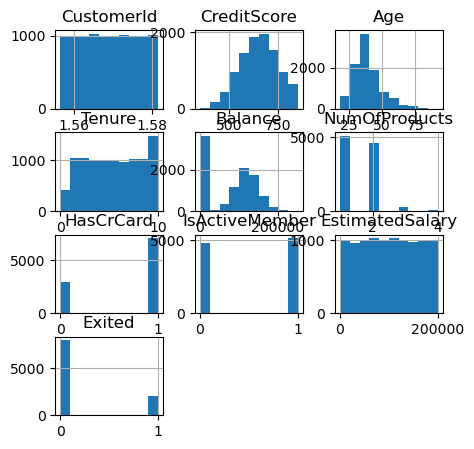

In [4]:
# 수치형 데이터 분포 확인
churn.describe()
churn.hist(figsize = (5,5))

In [5]:
# 범주형 데이터 분포 확인
def f_col_uk(x) : 
    col_list = x.select_dtypes(include=['object']).columns.tolist()
    return x[col_list].apply(lambda x : x.unique())

f_col_uk(churn)

Surname      [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...
Geography                        [France, Spain, nan, Germany]
Gender                                          [Female, Male]
dtype: object

In [6]:
churn.loc[churn['Balance'] == 0, :]

# 잔고가 0인 사람 약 36%  하지만 Exited가 0인 사람이 많다는것은 결측치로 예상됨
# NA로 들어온 [Geography, Age, HasCrCard, IsActiveMember]과함께 결측치 대체 필요

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.0,1,1.0,1.0,101348.88,1
3,15701354,Boni,699,France,Female,39.0,1,0.0,2,0.0,0.0,93826.63,0
6,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.80,0
11,15737173,Andrews,497,Spain,Male,24.0,3,0.0,2,1.0,0.0,76390.01,0
12,15632264,Kay,476,France,Female,34.0,10,0.0,2,1.0,0.0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,McMillan,841,Spain,Male,28.0,4,0.0,2,1.0,1.0,179436.60,0
9992,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.0,1,1.0,0.0,195192.40,0
9994,15719294,Wood,800,France,Female,29.0,2,0.0,2,0.0,0.0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39.0,5,0.0,2,1.0,0.0,96270.64,0


In [7]:
churn.loc[churn['Geography'].isna() | churn['Age'].isna() | churn['HasCrCard'].isna() | churn['IsActiveMember'].isna(), :]

# NA가 들어가는 행이 4개 밖에 없고 전부 이탈하지 않았으므로 NA를 포함한 4행 제거

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [8]:
churn = churn.dropna(how='any')
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [9]:
# 행 중복 제거(2줄 발견 - 잔고까지 같을 확율 낮음)
churn[churn.duplicated()]
churn = churn.drop_duplicates()
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [10]:
# 라벨인코딩
churn.loc[:,'Gender'] = churn['Gender'].replace({'Male' : 0, 'Female' : 1})
churn.loc[:,'Geography'] = churn['Geography'].replace({'France' : 0, 'Germany' : 1, 'Spain' : 2})

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

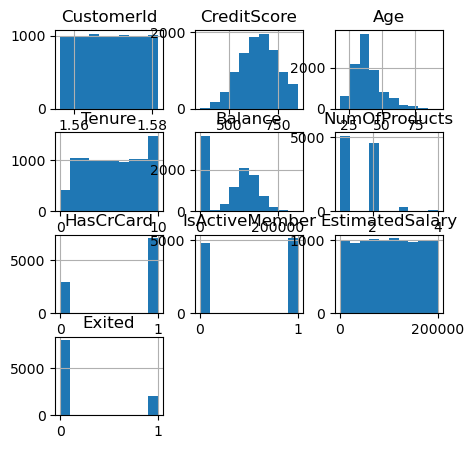

In [11]:
# 라벨 인코딩 후
churn.describe()
churn.hist(figsize = (5,5))

함수

In [12]:
# ttest (연속 범주)
def ttest(x,y):
    from scipy.stats import ttest_ind
    t_statistic, p_value = ttest_ind(x, y)
    return(p_value, p_value < 0.05)        

In [13]:
# 카이제곱 검정 (범주 범주)
def chi2(x,y): 
    from scipy.stats import chi2_contingency
    table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(table)
    return (p_value, p_value<0.05)

In [14]:
# 각 변수의 데이터별 총 갯수 출력
def unique_num(x):
    for i in x.columns:
        print(i)
        for j in x[i].unique():
            a1 = 0
            for z in x[i]:
                if j == z:
                    a1 += 1
            print(j ,':', a1)

In [15]:
def visual(x):
    import plotly.express as px
    a1 = 00
    for i in x.loc[(x['Exited']==1),:].columns:
        fig = px.histogram(x[i],color = x['Exited'], title = i)
        fig.show()
        a1 += 1

In [16]:
# =============================================================================
# 단변량 분석(가설 검정) 
# =============================================================================
# 1. X : 연속형, Y : 범주형
# H0 : 변수가 유의하지 않다
from scipy.stats import ttest_ind
def t_pval(X, y) :
    t_statistic, p_value = ttest_ind(X, y)
    return(p_value < 0.05, p_value) 

In [17]:
# 1) CreditScore
t_pval1 = t_pval(churn['CreditScore'], churn['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn['EstimatedSalary'], churn['Exited'])
# 3) Age
t_pval3 = t_pval(churn['Age'], churn['Exited'])   # 범주형으러 만들시 예측룰 하락
# 4) Balance1
bal1 = churn.loc[churn['Balance'] != 0, 'Balance']
bal1_y = churn.loc[churn['Balance'] != 0, 'Exited']
t_pval4 = t_pval(bal1, bal1_y)

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)
print("Balance1: ",t_pval4)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)
Balance1:  (True, 0.0)


In [18]:
# 1) CreditScore
t_pval1 = t_pval(churn['CreditScore'], churn['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn['EstimatedSalary'], churn['Exited'])
# 3) Age
t_pval3 = t_pval(churn['Age'], churn['Exited'])   # 범주형으로 만들시 예측률 하락
# 4) Balance1
bal1 = churn.loc[churn['Balance'] != 0, 'Balance']
bal1_y = churn.loc[churn['Balance'] != 0, 'Exited']
t_pval4 = t_pval(bal1, bal1_y)

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)
print("Balance1: ",t_pval4)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)
Balance1:  (True, 0.0)


In [19]:
# 2. X : 범주형, Y : 범주형
# H0 : 변수간의 연관성이 없다(독립적이다)
from scipy.stats import chi2_contingency

def chi_pval(X, y) :
    contingency_table = pd.crosstab(X, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
    return(p_value < 0.05, p_value) 

In [20]:
# 1) Geography
chi_pval1 = chi_pval(churn['Geography'], churn['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn['Gender'], churn['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn['Tenure'], churn['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn['NumOfProducts'], churn['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn['HasCrCard'], churn['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn['IsActiveMember'], churn['Exited'])
# 7) Balance2
churn.loc[:, 'Balance2'] = churn['Balance']
churn.loc[churn['Balance2'] != 0, 'Balance2'] = NA
churn.loc[:, 'Balance2'] = churn['Balance2'].fillna(1)
chi_pval7 = chi_pval(churn['Balance2'], churn['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)
print("Balance2:", chi_pval7)

Geography: (True, 4.817908324955522e-66)
Gender: (True, 2.447348702864124e-26)
Tenure: (False, 0.1837436573107323)
NumOfProducts: (True, 0.0)
HasCrCard: (False, 0.49360421666617627)
IsActiveMember: (True, 1.1830476712052914e-54)
Balance2: (True, 2.5884188913780945e-34)


C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\3133124266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn.loc[:, 'Balance2'] = churn['Balance']


In [21]:
# =============================================================================
# Balance 0의 의미 연구 - 예비 이탈자?
# =============================================================================
churn_test = churn.loc[churn['Balance'] == 0, :]               # 총 3616개
churn_test = churn_test.drop('CustomerId', axis = 1)
churn_test

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2
0,Hargrave,619,0,1,42.0,2,0.0,1,1.0,1.0,101348.88,1,0.0
3,Boni,699,0,1,39.0,1,0.0,2,0.0,0.0,93826.63,0,0.0
11,Andrews,497,2,0,24.0,3,0.0,2,1.0,0.0,76390.01,0,0.0
12,Kay,476,0,1,34.0,10,0.0,2,1.0,0.0,26260.98,0,0.0
13,Chin,549,0,1,25.0,5,0.0,2,0.0,0.0,190857.79,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,McMillan,841,2,0,28.0,4,0.0,2,1.0,1.0,179436.60,0,0.0
9992,Chukwualuka,726,2,0,36.0,2,0.0,1,1.0,0.0,195192.40,0,0.0
9994,Wood,800,0,1,29.0,2,0.0,2,0.0,0.0,167773.55,0,0.0
9995,Obijiaku,771,0,0,39.0,5,0.0,2,1.0,0.0,96270.64,0,0.0


In [22]:
# Geography에 대한 랜덤성
chi_pval(churn_test['Geography'], churn_test['Exited'])

# 잔고가 0인 경우에는 고객의 거주 국가와 이탈 여부 간의 연관성이 낮다
# 결측치보다는 다른의미를 시사

(False, 0.8146472025921957)

In [24]:
# Balance가 0인 고객들의 변수들을 시각화해서 변수들의 공통점/차이점 해보자
# 가설검정 및 시각화
# 1) CreditScore
t_pval1 = t_pval(churn_test['CreditScore'], churn_test['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn_test['EstimatedSalary'], churn_test['Exited'])
# 3) Age
t_pval3 = t_pval(churn_test['Age'], churn_test['Exited'])

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)


In [25]:
# 1) Geography
chi_pval1 = chi_pval(churn_test['Geography'], churn_test['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn_test['Gender'], churn_test['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn_test['Tenure'], churn_test['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn_test['NumOfProducts'], churn_test['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn_test['HasCrCard'], churn_test['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn_test['IsActiveMember'], churn_test['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)

Geography: (False, 0.8146472025921957)
Gender: (True, 4.1272938912593294e-09)
Tenure: (False, 0.1617315865966249)
NumOfProducts: (True, 1.4161770250352678e-205)
HasCrCard: (False, 0.5374558526681401)
IsActiveMember: (True, 4.2252404027504234e-14)


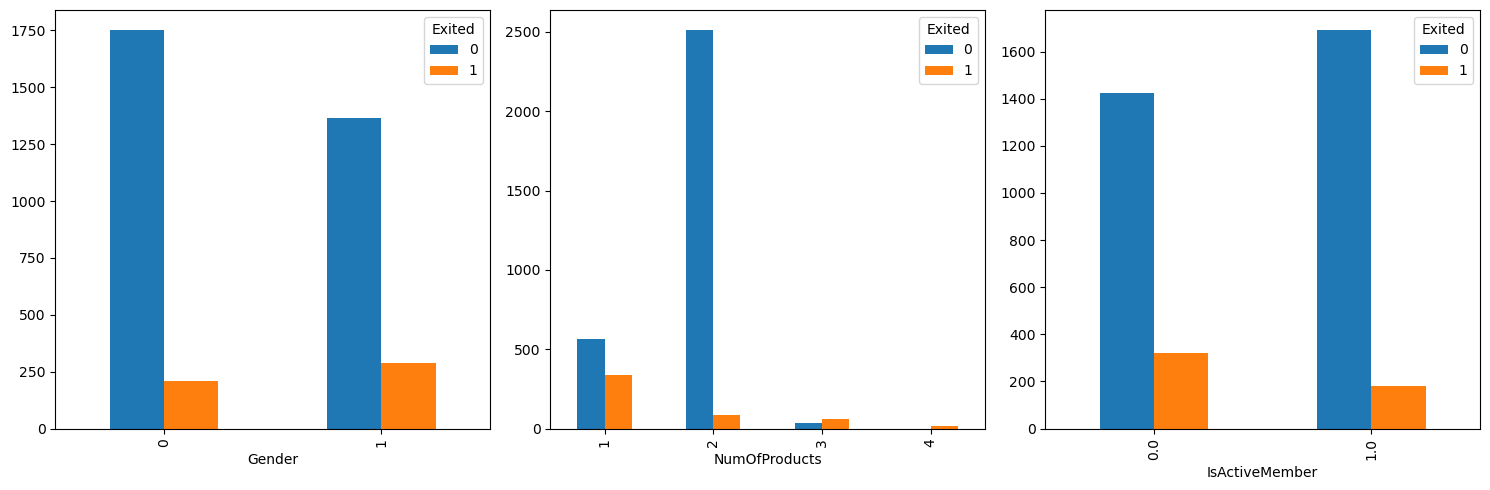

Exited,0,1
NumOfProducts,,
1,567,338
2,2513,86
3,36,62
4,0,14


In [27]:
import matplotlib.pyplot as plt
# 유의미 변수 시각화
g2 = pd.crosstab(churn_test['Gender'], churn_test['Exited'])
p1 = pd.crosstab(churn_test['NumOfProducts'], churn_test['Exited'])
m1 = pd.crosstab(churn_test['IsActiveMember'], churn_test['Exited'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  

g2.plot(kind='bar', ax=ax[0])
p1.plot(kind='bar', ax=ax[1])
m1.plot(kind='bar', ax=ax[2])

plt.tight_layout()  
plt.show()
p1

In [28]:
# =============================================================================
# Balane != 0
# =============================================================================
churn_test1 = churn.loc[churn['Balance'] != 0, :]               # 총 6382개
churn_test1 = churn_test1.drop('CustomerId', axis = 1)
churn_test1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2
1,Hill,608,2,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1.0
2,Onio,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0
5,Chu,645,2,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,1.0
7,Obinna,376,1,1,29.0,4,115046.74,4,1.0,0.0,119346.88,1,1.0
10,Bearce,528,0,0,31.0,6,102016.72,2,0.0,0.0,80181.12,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,Ajuluchukwu,597,0,1,53.0,4,88381.21,1,1.0,0.0,69384.71,1,1.0
9993,Rahman,644,0,0,28.0,7,155060.41,1,1.0,0.0,29179.52,0,1.0
9996,Johnstone,516,0,0,35.0,10,57369.61,1,1.0,1.0,101699.77,0,1.0
9998,Sabbatini,772,1,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1.0


In [29]:
# 가설검정 및 시각화
# 1) CreditScore
t_pval1 = t_pval(churn_test1['CreditScore'], churn_test1['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn_test1['EstimatedSalary'], churn_test1['Exited'])
# 3) Age
t_pval3 = t_pval(churn_test1['Age'], churn_test1['Exited'])

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)


In [30]:
# 1) Geography
chi_pval1 = chi_pval(churn_test1['Geography'], churn_test1['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn_test1['Gender'], churn_test1['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn_test1['Tenure'], churn_test1['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn_test1['NumOfProducts'], churn_test1['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn_test1['HasCrCard'], churn_test1['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn_test1['IsActiveMember'], churn_test1['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)

Geography: (True, 3.650322826318904e-35)
Gender: (True, 2.598465390816895e-19)
Tenure: (False, 0.11538713990745171)
NumOfProducts: (True, 7.680049369760182e-158)
HasCrCard: (False, 0.88853775387753)
IsActiveMember: (True, 1.4211591791329608e-42)


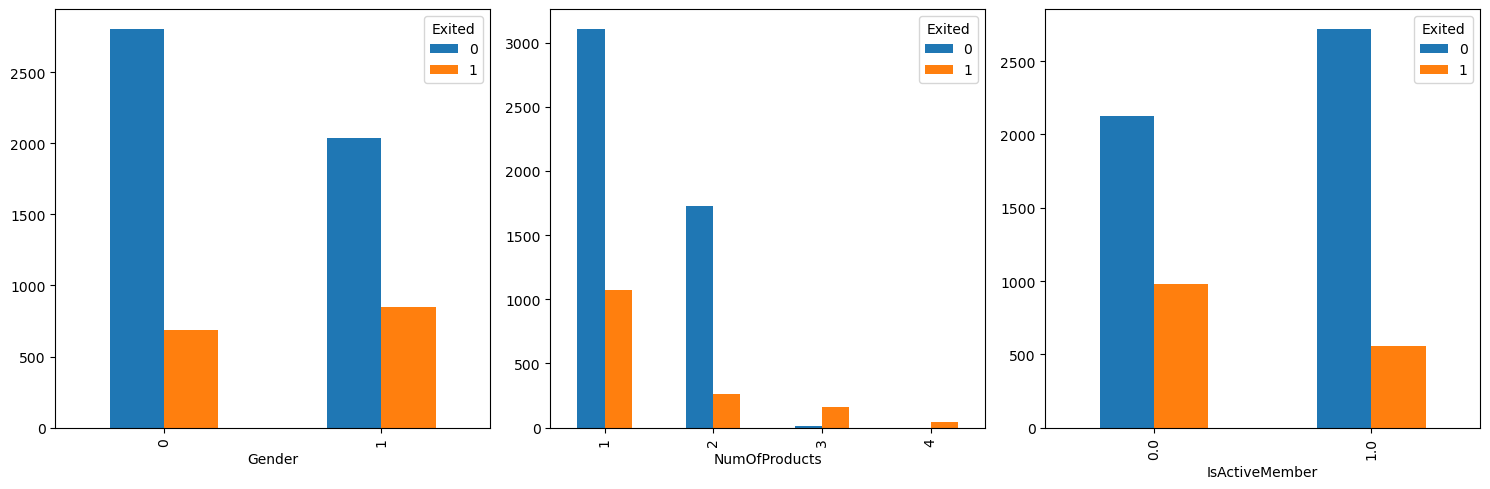

Exited,0,1
NumOfProducts,,
1,3106,1071
2,1727,262
3,10,158
4,0,46


In [31]:
# 유의미 변수 시각화
g21 = pd.crosstab(churn_test1['Gender'], churn_test1['Exited'])
p11 = pd.crosstab(churn_test1['NumOfProducts'], churn_test1['Exited'])
m11 = pd.crosstab(churn_test1['IsActiveMember'], churn_test1['Exited'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

g21.plot(kind='bar', ax=ax[0])
p11.plot(kind='bar', ax=ax[1])
m11.plot(kind='bar', ax=ax[2])

plt.tight_layout()  
plt.show()
p11

Text(0.5, 1.0, 'Balance != 0')

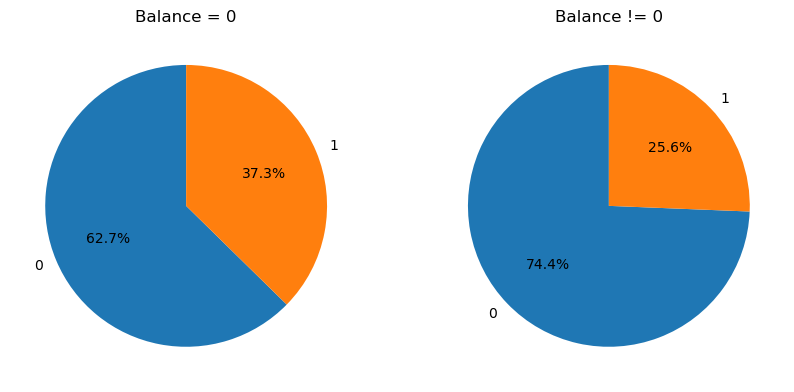

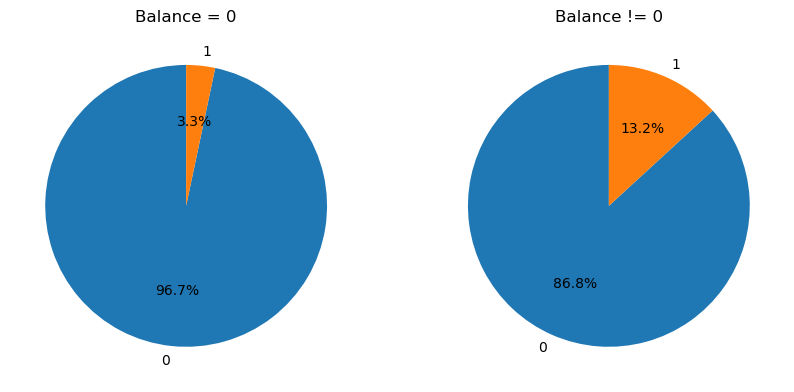

In [32]:
# => Number of Product가 크게 달라짐을 볼수 있음
# 결론이 약간  balance가 0인 사람들이 상품을 1개만 가지고 있을때 상대적으로 이탈확률이 높았다..?
# 확인을 위해 비율 두개만 시각화
# n_product = 1
bal0 = churn_test.loc[churn_test['NumOfProducts']== 1, 'Exited']
bal0 = Series([bal0[bal0 == 0].count(), bal0[bal0 == 1].count()])
ratio0 = bal0/bal0.sum()

bal1 = churn_test1.loc[churn_test1['NumOfProducts']== 1, 'Exited']
bal1 = Series([bal1[bal1 == 0].count(), bal1[bal1 == 1].count()])
ratio1 = bal1/bal1.sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(ratio0, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Balance = 0')

axs[1].pie(ratio1, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Balance != 0')

# n_product = 2
bal0 = churn_test.loc[churn_test['NumOfProducts']== 2, 'Exited']
bal0 = Series([bal0[bal0 == 0].count(), bal0[bal0 == 1].count()])
ratio0 = bal0/bal0.sum()

bal1 = churn_test1.loc[churn_test1['NumOfProducts']== 2, 'Exited']
bal1 = Series([bal1[bal1 == 0].count(), bal1[bal1 == 1].count()])
ratio1 = bal1/bal1.sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(ratio0, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Balance = 0')

axs[1].pie(ratio1, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Balance != 0')

Balance = 0인 모든 데이터를 결측치로 보기 어려운 이유  3가지 :
1. Exited(범주) 종속변수와 balance(수치) 독립변수의 로지스틱
=> 회귀결과 & t-test p-value 값 매우유의
2. 랜덤포레스트로  모델구축하면서 피쳐중요도 분석결과, balance 컬럼의 중요도가 꽤나 상위권. 그래서 결측치로 예상되는 컬럼을 제외하고 모델구축할시 조금의 예측률 하락이 있었음 
-> 결측치가 많다 생각한 피쳐가 예측률향상에 유용함 -> 결측치가 아닐수있음 
3. 해당은행의 상품수(여신,대출,등등)을 이용중인 고객에 대하여 
-- 상품을 1개 이용하는 고객 + 2개 이용하는 고객 합쳐서 97.5퍼센트. 
   따라서 1개 or 2개 고객에 대해서, balance=1이면서 상품 1개 이용중인 고객의 이탈율 = 25.63%, 
   balance=1이면서 상품 2개 이용중인 고객의 이탈율 = 13.17% 
   => 상품 1개이용중인고객보다 상품 2개 이용중인고객의 이탈율 12.5%감소

   이제 balance=0이면서 상품 1개 이용중인 고객의 이탈율 = 37.35%
   balance=0이면서 상품 2개 이용중인 고객의 이탈율 = 3.31%
   => 상품 1개이용중인고객보다 상품 2개 이용중인고객의 이탈율 34.04%감소

   상품 1개 이용중인 고객의 이탈율 가장크다 
   감소의 방향성이 이용중인상품이 2개인 고객과 일치하므로 마냥 결측치들의 집합이라고 보긴 어렵다는 결론. 
   하지만 결측치가 아니라 정면반박하기엔 약함.

결론(insight): 특정상품수 이상되면 이탈높아짐
1. 상품 1개만가지고있는경우 이탈율이 크다, 따라서 상품을 빠른시간안에 1개 초과로 가지고있게해야한다. 
2. 이용중인상품 2개이상인 사람들에 대해 이탈율이 여전히 높거나 존재하는것에대해서는, 새로이 이용하고자 하는 상품에 대한 파악시급 -> 파악한 후 그 상품의 매력도 측정, 빠른 개선이 필수(이탈방지). 왜냐하면 최대 관심사 상품의 좋고 나쁘고에 따라이탈여부 발생하므로.  --- 와 같은 인사이트와 대책을 마련해볼수있음 

In [33]:
# 3. 모델링
# 데이터 나누기
churn_x = churn.drop(['Exited','CustomerId','Surname','Balance2'], axis = 1)
churn_y = churn['Exited'] 

from sklearn.model_selection import train_test_split, cross_val_score as cv
train_x, test_x, train_y, test_y = train_test_split(churn_x, churn_y, random_state=0)

# 1차모델) RF
from sklearn.ensemble import RandomForestClassifier as rf_c

m_rf = rf_c()
cv_score_rf = cv(m_rf, churn_x, churn_y, cv = 5)
cv_score_rf.mean()    

0.8625453726863432

In [34]:
m_rf = rf_c()
m_rf.fit(train_x, train_y)
print("Train_score :",m_rf.score(train_x, train_y))
print("Test_score",m_rf.score(test_x, test_y))     
# 과적합 발생

Train_score : 1.0
Test_score 0.8571428571428571


In [35]:
from sklearn.metrics import roc_auc_score

rf_probs_tr = m_rf.predict_proba(train_x)[:, 1]
rf_probs_te = m_rf.predict_proba(test_x)[:, 1]

# AUC 계산
rf_auc_tr = roc_auc_score(train_y, rf_probs_tr)   # 1.0
rf_auc_te = roc_auc_score(test_y, rf_probs_te)    # 0.85
print(rf_auc_tr)
print(rf_auc_te)

1.0
0.8527032117214766


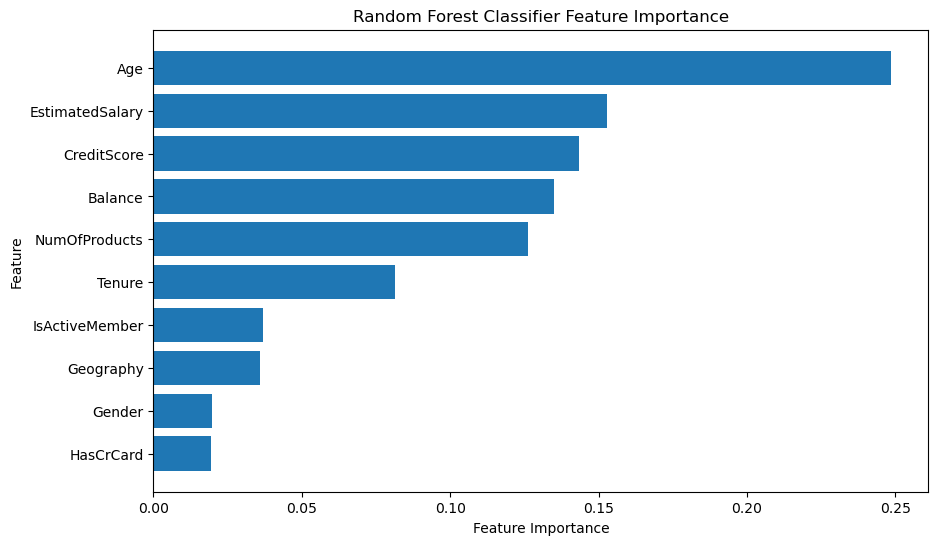

In [36]:
plt.figure(figsize=(10, 6))
sorted_indices = m_rf.feature_importances_.argsort()  # 변수 중요도를 오름차순으로 정렬한 인덱스
plt.barh(range(len(m_rf.feature_importances_)), m_rf.feature_importances_[sorted_indices], align='center')
plt.yticks(range(len(m_rf.feature_importances_)), churn_x.columns[sorted_indices])  # 열 이름을 y축에 표시
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier Feature Importance')
plt.show()

In [37]:
# 파생변수

churn['CH'] = churn['CreditScore']*churn['HasCrCard']
churn['AE'] = churn['Age']*churn['EstimatedSalary']
churn['BA'] =churn['Balance']*churn['Age']
churn['B_ES'] = churn['Balance'] / churn['EstimatedSalary']
churn['T_NoP'] = churn['Tenure'] / churn['NumOfProducts']
churn['HM'] = churn['HasCrCard'] * churn['IsActiveMember']

churn

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['CH'] = churn['CreditScore']*churn['HasCrCard']
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['AE'] = churn['Age']*churn['EstimatedSalary']
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2,CH,AE,BA,B_ES,T_NoP,HM
0,15634602,Hargrave,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,0.0,619.0,4256652.96,0.00,0.000000,2.000000,1.0
1,15647311,Hill,608,2,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1.0,0.0,4614245.78,3436122.26,0.744677,1.000000,0.0
2,15619304,Onio,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0,502.0,4785125.94,6705753.60,1.401375,2.666667,0.0
3,15701354,Boni,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,0.0,0.0,3659238.57,0.00,0.000000,0.500000,0.0
5,15574012,Chu,645,2,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,1.0,645.0,6589295.24,5005254.32,0.759604,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,0,39.0,5,0.00,2,1.0,0.0,96270.64,0,0.0,771.0,3754554.96,0.00,0.000000,2.500000,0.0
9996,15569892,Johnstone,516,0,0,35.0,10,57369.61,1,1.0,1.0,101699.77,0,1.0,516.0,3559491.95,2007936.35,0.564108,10.000000,1.0
9997,15584532,Liu,709,0,1,36.0,7,0.00,1,0.0,1.0,42085.58,1,0.0,0.0,1515080.88,0.00,0.000000,7.000000,0.0
9998,15682355,Sabbatini,772,1,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1.0,772.0,3901317.84,3153163.02,0.808230,1.500000,0.0


In [38]:
# 파생변수 유의성
t_pval1 = t_pval(churn['CH'], churn['Exited'])
t_pval2 = t_pval(churn['AE'], churn['Exited'])
t_pval3 = t_pval(churn['BA'], churn['Exited'])
t_pval4 = t_pval(churn['B_ES'], churn['Exited'])
t_pval5 = t_pval(churn['T_NoP'], churn['Exited'])
t_pval6 = t_pval(churn['HM'], churn['Exited'])

print("CreditScore*HasCrCard: ",t_pval1)
print("Age*EstimatedSalary: ",t_pval2)
print("Balance*Age: ",t_pval3)
print("Balance/EstimatedSalary: ",t_pval4)
print("Tenure/NumOfProducts: ",t_pval5)
print("HasCrCard*IsActiveMember: ",t_pval6)

CreditScore*HasCrCard:  (True, 0.0)
Age*EstimatedSalary:  (True, 0.0)
Balance*Age:  (True, 0.0)
Balance/EstimatedSalary:  (True, 0.000696026685286789)
Tenure/NumOfProducts:  (True, 0.0)
HasCrCard*IsActiveMember:  (True, 6.4242226914233925e-136)


In [41]:
# 2차 모델

# Catboost
import pandas as pd
churn_cat = pd.read_csv('Churn_Modelling_v1.csv')
churn_cat = churn_cat.drop_duplicates()
churn_cat = churn_cat.dropna()
churn_cat['HasCrCard-IsActiveMember'] =churn_cat['HasCrCard'] - churn_cat['IsActiveMember']
churn_cat['CreditScore*HasCrCard']=churn_cat['CreditScore']*churn_cat['HasCrCard']
churn_cat['Age*EstimatedSalary'] = churn_cat['Age']*churn['EstimatedSalary']
churn_cat['Balance*Age']=churn_cat['Balance']*churn_cat['Age']
churn_cat['Balance/EstimatedSalary'] = churn_cat['Balance'] / churn_cat['EstimatedSalary']
churn_cat['Balance-EstimatedSalary'] = abs(churn_cat['Balance'] - churn_cat['EstimatedSalary'])
churn_cat['Tenure-HasCrCard-IsActiveMember'] = (churn_cat['Tenure']-(churn_cat['HasCrCard']-churn_cat['IsActiveMember']))
churn_cat['Tenure/NumOfProducts'] = churn_cat['Tenure'] / churn_cat['NumOfProducts']
churn_cat['Balance/EstimatedSalary*NumOfProducts'] =(churn_cat['Balance'] / churn_cat['EstimatedSalary'])*churn_cat['NumOfProducts']
from numpy import NAN as Na
# vip
churn_cat.loc[churn_cat['Balance/EstimatedSalary*NumOfProducts']>100,:] = NA
churn_cat.dropna(inplace = True)
# 33
churn_cat['Geography'] = churn_cat['Geography'].map({'France':0,'Germany':1, 'Spain':2})
churn_cat['Gender'] = churn_cat['Gender'].map({'Female':0, 'Male':1})
churn_cat = churn_cat.drop_duplicates().drop(['RowNumber','Surname','CustomerId'],axis = 1)
churn_cat_x = churn_cat.drop('Exited', axis = 1)
churn_cat_y = churn_cat['Exited']
train_x, test_x, train_y, test_y = train_test_split(churn_cat_x, churn_cat_y, random_state=0)

In [42]:
from catboost import CatBoostClassifier as cbc

m_cb = cbc()
m_cb.fit(train_x, train_y)
print(m_cb.score(train_x, train_y))    # 91.79
print(m_cb.score(test_x, test_y))      # 86.04

Learning rate set to 0.024298
0:	learn: 0.6743280	total: 9.07ms	remaining: 9.06s
1:	learn: 0.6555205	total: 17.7ms	remaining: 8.84s
2:	learn: 0.6369338	total: 26.2ms	remaining: 8.7s
3:	learn: 0.6207292	total: 35.8ms	remaining: 8.91s
4:	learn: 0.6048110	total: 51.7ms	remaining: 10.3s
5:	learn: 0.5896191	total: 71.1ms	remaining: 11.8s
6:	learn: 0.5753881	total: 81.7ms	remaining: 11.6s
7:	learn: 0.5640866	total: 102ms	remaining: 12.6s
8:	learn: 0.5528199	total: 112ms	remaining: 12.3s
9:	learn: 0.5407655	total: 122ms	remaining: 12.1s
10:	learn: 0.5299698	total: 133ms	remaining: 11.9s
11:	learn: 0.5200343	total: 140ms	remaining: 11.5s
12:	learn: 0.5112705	total: 147ms	remaining: 11.1s
13:	learn: 0.5026293	total: 157ms	remaining: 11.1s
14:	learn: 0.4957119	total: 173ms	remaining: 11.4s
15:	learn: 0.4892637	total: 190ms	remaining: 11.7s
16:	learn: 0.4811316	total: 219ms	remaining: 12.6s
17:	learn: 0.4734727	total: 228ms	remaining: 12.4s
18:	learn: 0.4675514	total: 237ms	remaining: 12.2s
19:	l

176:	learn: 0.3159628	total: 1.86s	remaining: 8.63s
177:	learn: 0.3158348	total: 1.86s	remaining: 8.61s
178:	learn: 0.3155937	total: 1.88s	remaining: 8.61s
179:	learn: 0.3154382	total: 1.89s	remaining: 8.59s
180:	learn: 0.3153037	total: 1.89s	remaining: 8.57s
181:	learn: 0.3150479	total: 1.9s	remaining: 8.55s
182:	learn: 0.3148324	total: 1.91s	remaining: 8.53s
183:	learn: 0.3146496	total: 1.92s	remaining: 8.5s
184:	learn: 0.3145603	total: 1.92s	remaining: 8.48s
185:	learn: 0.3142552	total: 1.93s	remaining: 8.45s
186:	learn: 0.3140878	total: 1.94s	remaining: 8.43s
187:	learn: 0.3139606	total: 1.95s	remaining: 8.4s
188:	learn: 0.3138195	total: 1.95s	remaining: 8.38s
189:	learn: 0.3136426	total: 1.96s	remaining: 8.35s
190:	learn: 0.3134183	total: 1.97s	remaining: 8.33s
191:	learn: 0.3131935	total: 1.97s	remaining: 8.31s
192:	learn: 0.3130436	total: 1.99s	remaining: 8.3s
193:	learn: 0.3129084	total: 2s	remaining: 8.29s
194:	learn: 0.3127341	total: 2.01s	remaining: 8.3s
195:	learn: 0.312591

343:	learn: 0.2900116	total: 3.76s	remaining: 7.17s
344:	learn: 0.2898425	total: 3.77s	remaining: 7.16s
345:	learn: 0.2897735	total: 3.78s	remaining: 7.15s
346:	learn: 0.2896491	total: 3.79s	remaining: 7.14s
347:	learn: 0.2895316	total: 3.81s	remaining: 7.14s
348:	learn: 0.2894201	total: 3.82s	remaining: 7.12s
349:	learn: 0.2893416	total: 3.83s	remaining: 7.11s
350:	learn: 0.2892292	total: 3.85s	remaining: 7.12s
351:	learn: 0.2891237	total: 3.86s	remaining: 7.11s
352:	learn: 0.2889977	total: 3.88s	remaining: 7.1s
353:	learn: 0.2888811	total: 3.88s	remaining: 7.09s
354:	learn: 0.2887757	total: 3.9s	remaining: 7.09s
355:	learn: 0.2886258	total: 3.91s	remaining: 7.08s
356:	learn: 0.2884799	total: 3.92s	remaining: 7.07s
357:	learn: 0.2883605	total: 3.93s	remaining: 7.05s
358:	learn: 0.2882119	total: 3.94s	remaining: 7.04s
359:	learn: 0.2880475	total: 3.95s	remaining: 7.02s
360:	learn: 0.2879348	total: 3.96s	remaining: 7.01s
361:	learn: 0.2878394	total: 3.96s	remaining: 6.99s
362:	learn: 0.

530:	learn: 0.2666517	total: 5.23s	remaining: 4.62s
531:	learn: 0.2665393	total: 5.24s	remaining: 4.61s
532:	learn: 0.2664214	total: 5.25s	remaining: 4.59s
533:	learn: 0.2663007	total: 5.25s	remaining: 4.59s
534:	learn: 0.2662027	total: 5.26s	remaining: 4.57s
535:	learn: 0.2660908	total: 5.27s	remaining: 4.56s
536:	learn: 0.2659749	total: 5.28s	remaining: 4.55s
537:	learn: 0.2658928	total: 5.28s	remaining: 4.54s
538:	learn: 0.2657857	total: 5.29s	remaining: 4.53s
539:	learn: 0.2656623	total: 5.3s	remaining: 4.51s
540:	learn: 0.2655692	total: 5.3s	remaining: 4.5s
541:	learn: 0.2654580	total: 5.31s	remaining: 4.49s
542:	learn: 0.2653445	total: 5.32s	remaining: 4.48s
543:	learn: 0.2652272	total: 5.32s	remaining: 4.46s
544:	learn: 0.2651081	total: 5.33s	remaining: 4.45s
545:	learn: 0.2649945	total: 5.34s	remaining: 4.44s
546:	learn: 0.2649204	total: 5.34s	remaining: 4.42s
547:	learn: 0.2647483	total: 5.35s	remaining: 4.41s
548:	learn: 0.2646320	total: 5.35s	remaining: 4.4s
549:	learn: 0.26

691:	learn: 0.2486387	total: 6.25s	remaining: 2.78s
692:	learn: 0.2485080	total: 6.26s	remaining: 2.77s
693:	learn: 0.2484075	total: 6.27s	remaining: 2.76s
694:	learn: 0.2483285	total: 6.27s	remaining: 2.75s
695:	learn: 0.2482176	total: 6.28s	remaining: 2.74s
696:	learn: 0.2481516	total: 6.29s	remaining: 2.73s
697:	learn: 0.2480281	total: 6.29s	remaining: 2.72s
698:	learn: 0.2479354	total: 6.3s	remaining: 2.71s
699:	learn: 0.2477781	total: 6.31s	remaining: 2.7s
700:	learn: 0.2476842	total: 6.31s	remaining: 2.69s
701:	learn: 0.2475970	total: 6.32s	remaining: 2.68s
702:	learn: 0.2474624	total: 6.33s	remaining: 2.67s
703:	learn: 0.2473779	total: 6.34s	remaining: 2.66s
704:	learn: 0.2472414	total: 6.34s	remaining: 2.65s
705:	learn: 0.2471521	total: 6.35s	remaining: 2.64s
706:	learn: 0.2470484	total: 6.36s	remaining: 2.63s
707:	learn: 0.2469354	total: 6.36s	remaining: 2.62s
708:	learn: 0.2467916	total: 6.37s	remaining: 2.61s
709:	learn: 0.2466651	total: 6.37s	remaining: 2.6s
710:	learn: 0.2

859:	learn: 0.2312545	total: 7.97s	remaining: 1.3s
860:	learn: 0.2311566	total: 7.97s	remaining: 1.29s
861:	learn: 0.2310985	total: 8s	remaining: 1.28s
862:	learn: 0.2310064	total: 8.01s	remaining: 1.27s
863:	learn: 0.2308899	total: 8.02s	remaining: 1.26s
864:	learn: 0.2308148	total: 8.03s	remaining: 1.25s
865:	learn: 0.2306572	total: 8.04s	remaining: 1.24s
866:	learn: 0.2305170	total: 8.05s	remaining: 1.24s
867:	learn: 0.2304780	total: 8.06s	remaining: 1.23s
868:	learn: 0.2303601	total: 8.07s	remaining: 1.22s
869:	learn: 0.2302424	total: 8.08s	remaining: 1.21s
870:	learn: 0.2301705	total: 8.09s	remaining: 1.2s
871:	learn: 0.2300735	total: 8.09s	remaining: 1.19s
872:	learn: 0.2299786	total: 8.1s	remaining: 1.18s
873:	learn: 0.2298881	total: 8.11s	remaining: 1.17s
874:	learn: 0.2297491	total: 8.12s	remaining: 1.16s
875:	learn: 0.2296478	total: 8.13s	remaining: 1.15s
876:	learn: 0.2295610	total: 8.14s	remaining: 1.14s
877:	learn: 0.2294602	total: 8.15s	remaining: 1.13s
878:	learn: 0.2293

In [43]:
cv_score_cb = cv(m_cb, churn_cat_x, churn_cat_y, cv = 5)
print(cv_score_cb.mean())      # 86.54

Learning rate set to 0.024976
0:	learn: 0.6734936	total: 9.49ms	remaining: 9.48s
1:	learn: 0.6549142	total: 18.9ms	remaining: 9.42s
2:	learn: 0.6364297	total: 26.7ms	remaining: 8.88s
3:	learn: 0.6204544	total: 34.9ms	remaining: 8.69s
4:	learn: 0.6044651	total: 49.4ms	remaining: 9.83s
5:	learn: 0.5894742	total: 57.7ms	remaining: 9.56s
6:	learn: 0.5753578	total: 70.1ms	remaining: 9.94s
7:	learn: 0.5619822	total: 78.4ms	remaining: 9.72s
8:	learn: 0.5501392	total: 86.4ms	remaining: 9.51s
9:	learn: 0.5382963	total: 94.7ms	remaining: 9.38s
10:	learn: 0.5269903	total: 103ms	remaining: 9.26s
11:	learn: 0.5181036	total: 111ms	remaining: 9.16s
12:	learn: 0.5087046	total: 123ms	remaining: 9.36s
13:	learn: 0.5011644	total: 136ms	remaining: 9.6s
14:	learn: 0.4933160	total: 145ms	remaining: 9.51s
15:	learn: 0.4866537	total: 153ms	remaining: 9.41s
16:	learn: 0.4781763	total: 162ms	remaining: 9.35s
17:	learn: 0.4708841	total: 171ms	remaining: 9.35s
18:	learn: 0.4654385	total: 182ms	remaining: 9.4s
19:

162:	learn: 0.3197740	total: 1.92s	remaining: 9.86s
163:	learn: 0.3195369	total: 1.93s	remaining: 9.82s
164:	learn: 0.3193634	total: 1.93s	remaining: 9.79s
165:	learn: 0.3191843	total: 1.94s	remaining: 9.75s
166:	learn: 0.3189917	total: 1.95s	remaining: 9.72s
167:	learn: 0.3188535	total: 1.96s	remaining: 9.68s
168:	learn: 0.3187456	total: 1.96s	remaining: 9.65s
169:	learn: 0.3186346	total: 1.97s	remaining: 9.62s
170:	learn: 0.3184111	total: 1.98s	remaining: 9.59s
171:	learn: 0.3182878	total: 1.99s	remaining: 9.56s
172:	learn: 0.3178742	total: 1.99s	remaining: 9.53s
173:	learn: 0.3176962	total: 2s	remaining: 9.5s
174:	learn: 0.3175319	total: 2.01s	remaining: 9.46s
175:	learn: 0.3173960	total: 2.02s	remaining: 9.44s
176:	learn: 0.3172578	total: 2.02s	remaining: 9.4s
177:	learn: 0.3170856	total: 2.03s	remaining: 9.37s
178:	learn: 0.3169850	total: 2.04s	remaining: 9.35s
179:	learn: 0.3166315	total: 2.05s	remaining: 9.32s
180:	learn: 0.3164553	total: 2.05s	remaining: 9.29s
181:	learn: 0.316

325:	learn: 0.2941764	total: 3.16s	remaining: 6.54s
326:	learn: 0.2940517	total: 3.17s	remaining: 6.52s
327:	learn: 0.2938809	total: 3.18s	remaining: 6.51s
328:	learn: 0.2938177	total: 3.18s	remaining: 6.49s
329:	learn: 0.2936847	total: 3.19s	remaining: 6.49s
330:	learn: 0.2936054	total: 3.2s	remaining: 6.47s
331:	learn: 0.2935350	total: 3.21s	remaining: 6.46s
332:	learn: 0.2933646	total: 3.22s	remaining: 6.45s
333:	learn: 0.2932588	total: 3.23s	remaining: 6.44s
334:	learn: 0.2930869	total: 3.23s	remaining: 6.42s
335:	learn: 0.2929398	total: 3.24s	remaining: 6.41s
336:	learn: 0.2927245	total: 3.25s	remaining: 6.39s
337:	learn: 0.2925758	total: 3.26s	remaining: 6.38s
338:	learn: 0.2924900	total: 3.26s	remaining: 6.36s
339:	learn: 0.2924200	total: 3.27s	remaining: 6.34s
340:	learn: 0.2923042	total: 3.28s	remaining: 6.33s
341:	learn: 0.2922053	total: 3.28s	remaining: 6.32s
342:	learn: 0.2920706	total: 3.29s	remaining: 6.3s
343:	learn: 0.2919543	total: 3.29s	remaining: 6.29s
344:	learn: 0.

492:	learn: 0.2735039	total: 4.62s	remaining: 4.75s
493:	learn: 0.2733757	total: 4.63s	remaining: 4.74s
494:	learn: 0.2731566	total: 4.64s	remaining: 4.73s
495:	learn: 0.2729863	total: 4.69s	remaining: 4.76s
496:	learn: 0.2728917	total: 4.7s	remaining: 4.76s
497:	learn: 0.2727366	total: 4.71s	remaining: 4.75s
498:	learn: 0.2726153	total: 4.72s	remaining: 4.74s
499:	learn: 0.2725062	total: 4.73s	remaining: 4.73s
500:	learn: 0.2723758	total: 4.74s	remaining: 4.72s
501:	learn: 0.2722467	total: 4.76s	remaining: 4.72s
502:	learn: 0.2721417	total: 4.77s	remaining: 4.71s
503:	learn: 0.2720198	total: 4.78s	remaining: 4.71s
504:	learn: 0.2719062	total: 4.79s	remaining: 4.7s
505:	learn: 0.2717551	total: 4.8s	remaining: 4.69s
506:	learn: 0.2716488	total: 4.81s	remaining: 4.67s
507:	learn: 0.2714951	total: 4.82s	remaining: 4.66s
508:	learn: 0.2713977	total: 4.83s	remaining: 4.65s
509:	learn: 0.2713436	total: 4.83s	remaining: 4.64s
510:	learn: 0.2711963	total: 4.84s	remaining: 4.63s
511:	learn: 0.2

655:	learn: 0.2553097	total: 6.54s	remaining: 3.43s
656:	learn: 0.2552415	total: 6.55s	remaining: 3.42s
657:	learn: 0.2551139	total: 6.57s	remaining: 3.41s
658:	learn: 0.2550192	total: 6.58s	remaining: 3.4s
659:	learn: 0.2549065	total: 6.59s	remaining: 3.4s
660:	learn: 0.2548105	total: 6.61s	remaining: 3.39s
661:	learn: 0.2546676	total: 6.63s	remaining: 3.38s
662:	learn: 0.2545739	total: 6.64s	remaining: 3.37s
663:	learn: 0.2545030	total: 6.65s	remaining: 3.37s
664:	learn: 0.2544210	total: 6.67s	remaining: 3.36s
665:	learn: 0.2543020	total: 6.68s	remaining: 3.35s
666:	learn: 0.2542004	total: 6.69s	remaining: 3.34s
667:	learn: 0.2541007	total: 6.71s	remaining: 3.33s
668:	learn: 0.2539613	total: 6.71s	remaining: 3.32s
669:	learn: 0.2538480	total: 6.72s	remaining: 3.31s
670:	learn: 0.2537527	total: 6.73s	remaining: 3.3s
671:	learn: 0.2536121	total: 6.74s	remaining: 3.29s
672:	learn: 0.2535219	total: 6.75s	remaining: 3.28s
673:	learn: 0.2534367	total: 6.76s	remaining: 3.27s
674:	learn: 0.2

826:	learn: 0.2390815	total: 8.18s	remaining: 1.71s
827:	learn: 0.2390093	total: 8.19s	remaining: 1.7s
828:	learn: 0.2389090	total: 8.22s	remaining: 1.7s
829:	learn: 0.2388160	total: 8.23s	remaining: 1.69s
830:	learn: 0.2387043	total: 8.24s	remaining: 1.68s
831:	learn: 0.2385356	total: 8.25s	remaining: 1.67s
832:	learn: 0.2384514	total: 8.27s	remaining: 1.66s
833:	learn: 0.2383709	total: 8.28s	remaining: 1.65s
834:	learn: 0.2383123	total: 8.28s	remaining: 1.64s
835:	learn: 0.2382464	total: 8.29s	remaining: 1.63s
836:	learn: 0.2381420	total: 8.3s	remaining: 1.61s
837:	learn: 0.2380686	total: 8.3s	remaining: 1.6s
838:	learn: 0.2379773	total: 8.31s	remaining: 1.59s
839:	learn: 0.2378643	total: 8.32s	remaining: 1.58s
840:	learn: 0.2377773	total: 8.33s	remaining: 1.57s
841:	learn: 0.2376655	total: 8.34s	remaining: 1.56s
842:	learn: 0.2375727	total: 8.35s	remaining: 1.55s
843:	learn: 0.2374811	total: 8.36s	remaining: 1.54s
844:	learn: 0.2373624	total: 8.37s	remaining: 1.53s
845:	learn: 0.237

Learning rate set to 0.024978
0:	learn: 0.6740709	total: 9.75ms	remaining: 9.74s
1:	learn: 0.6557398	total: 17ms	remaining: 8.49s
2:	learn: 0.6369822	total: 24.2ms	remaining: 8.05s
3:	learn: 0.6204958	total: 32.8ms	remaining: 8.17s
4:	learn: 0.6039744	total: 39.9ms	remaining: 7.95s
5:	learn: 0.5883224	total: 47.9ms	remaining: 7.93s
6:	learn: 0.5735394	total: 58.5ms	remaining: 8.29s
7:	learn: 0.5619918	total: 66.2ms	remaining: 8.21s
8:	learn: 0.5496005	total: 73.3ms	remaining: 8.07s
9:	learn: 0.5373276	total: 80.6ms	remaining: 7.98s
10:	learn: 0.5260102	total: 87.8ms	remaining: 7.89s
11:	learn: 0.5159924	total: 93.9ms	remaining: 7.73s
12:	learn: 0.5073383	total: 102ms	remaining: 7.72s
13:	learn: 0.4986611	total: 111ms	remaining: 7.84s
14:	learn: 0.4916709	total: 124ms	remaining: 8.17s
15:	learn: 0.4851290	total: 138ms	remaining: 8.5s
16:	learn: 0.4778614	total: 153ms	remaining: 8.84s
17:	learn: 0.4711117	total: 162ms	remaining: 8.84s
18:	learn: 0.4655202	total: 169ms	remaining: 8.74s
19

161:	learn: 0.3224910	total: 2.12s	remaining: 11s
162:	learn: 0.3223082	total: 2.13s	remaining: 10.9s
163:	learn: 0.3221197	total: 2.17s	remaining: 11s
164:	learn: 0.3218624	total: 2.18s	remaining: 11s
165:	learn: 0.3216930	total: 2.19s	remaining: 11s
166:	learn: 0.3214747	total: 2.19s	remaining: 10.9s
167:	learn: 0.3211397	total: 2.22s	remaining: 11s
168:	learn: 0.3207681	total: 2.23s	remaining: 11s
169:	learn: 0.3205804	total: 2.24s	remaining: 10.9s
170:	learn: 0.3204768	total: 2.25s	remaining: 10.9s
171:	learn: 0.3201804	total: 2.25s	remaining: 10.8s
172:	learn: 0.3199716	total: 2.26s	remaining: 10.8s
173:	learn: 0.3197410	total: 2.27s	remaining: 10.8s
174:	learn: 0.3194816	total: 2.28s	remaining: 10.7s
175:	learn: 0.3193876	total: 2.29s	remaining: 10.7s
176:	learn: 0.3191781	total: 2.29s	remaining: 10.7s
177:	learn: 0.3189601	total: 2.3s	remaining: 10.6s
178:	learn: 0.3188202	total: 2.31s	remaining: 10.6s
179:	learn: 0.3186089	total: 2.32s	remaining: 10.6s
180:	learn: 0.3184518	tot

343:	learn: 0.2944614	total: 3.58s	remaining: 6.83s
344:	learn: 0.2943288	total: 3.59s	remaining: 6.82s
345:	learn: 0.2941975	total: 3.6s	remaining: 6.8s
346:	learn: 0.2940698	total: 3.61s	remaining: 6.79s
347:	learn: 0.2939693	total: 3.61s	remaining: 6.77s
348:	learn: 0.2938890	total: 3.62s	remaining: 6.75s
349:	learn: 0.2937800	total: 3.63s	remaining: 6.73s
350:	learn: 0.2936222	total: 3.63s	remaining: 6.71s
351:	learn: 0.2935198	total: 3.64s	remaining: 6.7s
352:	learn: 0.2934196	total: 3.64s	remaining: 6.68s
353:	learn: 0.2933450	total: 3.65s	remaining: 6.66s
354:	learn: 0.2932417	total: 3.66s	remaining: 6.64s
355:	learn: 0.2931066	total: 3.66s	remaining: 6.63s
356:	learn: 0.2929158	total: 3.67s	remaining: 6.61s
357:	learn: 0.2928189	total: 3.67s	remaining: 6.59s
358:	learn: 0.2926234	total: 3.68s	remaining: 6.57s
359:	learn: 0.2925240	total: 3.69s	remaining: 6.56s
360:	learn: 0.2923883	total: 3.7s	remaining: 6.54s
361:	learn: 0.2922824	total: 3.7s	remaining: 6.53s
362:	learn: 0.292

502:	learn: 0.2738500	total: 5.06s	remaining: 5s
503:	learn: 0.2737188	total: 5.08s	remaining: 5s
504:	learn: 0.2736031	total: 5.09s	remaining: 4.99s
505:	learn: 0.2735008	total: 5.09s	remaining: 4.97s
506:	learn: 0.2733214	total: 5.11s	remaining: 4.96s
507:	learn: 0.2732408	total: 5.12s	remaining: 4.96s
508:	learn: 0.2730235	total: 5.13s	remaining: 4.95s
509:	learn: 0.2729306	total: 5.14s	remaining: 4.94s
510:	learn: 0.2727745	total: 5.15s	remaining: 4.93s
511:	learn: 0.2726998	total: 5.17s	remaining: 4.92s
512:	learn: 0.2725413	total: 5.18s	remaining: 4.91s
513:	learn: 0.2724017	total: 5.19s	remaining: 4.91s
514:	learn: 0.2723076	total: 5.2s	remaining: 4.89s
515:	learn: 0.2721372	total: 5.21s	remaining: 4.89s
516:	learn: 0.2719917	total: 5.22s	remaining: 4.88s
517:	learn: 0.2717994	total: 5.24s	remaining: 4.87s
518:	learn: 0.2716570	total: 5.26s	remaining: 4.87s
519:	learn: 0.2715692	total: 5.28s	remaining: 4.88s
520:	learn: 0.2714104	total: 5.3s	remaining: 4.87s
521:	learn: 0.271274

666:	learn: 0.2539956	total: 7.47s	remaining: 3.73s
667:	learn: 0.2538997	total: 7.48s	remaining: 3.72s
668:	learn: 0.2537909	total: 7.49s	remaining: 3.7s
669:	learn: 0.2536931	total: 7.5s	remaining: 3.69s
670:	learn: 0.2535111	total: 7.5s	remaining: 3.68s
671:	learn: 0.2533489	total: 7.53s	remaining: 3.68s
672:	learn: 0.2532550	total: 7.54s	remaining: 3.67s
673:	learn: 0.2531288	total: 7.55s	remaining: 3.65s
674:	learn: 0.2530657	total: 7.56s	remaining: 3.64s
675:	learn: 0.2529478	total: 7.57s	remaining: 3.63s
676:	learn: 0.2528077	total: 7.58s	remaining: 3.62s
677:	learn: 0.2527121	total: 7.58s	remaining: 3.6s
678:	learn: 0.2526197	total: 7.59s	remaining: 3.59s
679:	learn: 0.2525536	total: 7.6s	remaining: 3.58s
680:	learn: 0.2524262	total: 7.61s	remaining: 3.56s
681:	learn: 0.2523268	total: 7.62s	remaining: 3.55s
682:	learn: 0.2522558	total: 7.63s	remaining: 3.54s
683:	learn: 0.2521925	total: 7.64s	remaining: 3.53s
684:	learn: 0.2520649	total: 7.65s	remaining: 3.52s
685:	learn: 0.251

829:	learn: 0.2377305	total: 9.58s	remaining: 1.96s
830:	learn: 0.2376308	total: 9.6s	remaining: 1.95s
831:	learn: 0.2375627	total: 9.61s	remaining: 1.94s
832:	learn: 0.2374782	total: 9.62s	remaining: 1.93s
833:	learn: 0.2374000	total: 9.63s	remaining: 1.92s
834:	learn: 0.2373237	total: 9.64s	remaining: 1.91s
835:	learn: 0.2372127	total: 9.65s	remaining: 1.89s
836:	learn: 0.2371105	total: 9.66s	remaining: 1.88s
837:	learn: 0.2369434	total: 9.68s	remaining: 1.87s
838:	learn: 0.2368287	total: 9.69s	remaining: 1.86s
839:	learn: 0.2367413	total: 9.69s	remaining: 1.85s
840:	learn: 0.2366396	total: 9.7s	remaining: 1.83s
841:	learn: 0.2364981	total: 9.71s	remaining: 1.82s
842:	learn: 0.2363681	total: 9.72s	remaining: 1.81s
843:	learn: 0.2363109	total: 9.73s	remaining: 1.8s
844:	learn: 0.2362123	total: 9.74s	remaining: 1.79s
845:	learn: 0.2361299	total: 9.75s	remaining: 1.77s
846:	learn: 0.2360372	total: 9.76s	remaining: 1.76s
847:	learn: 0.2359162	total: 9.77s	remaining: 1.75s
848:	learn: 0.2

998:	learn: 0.2225842	total: 11.2s	remaining: 11.2ms
999:	learn: 0.2225201	total: 11.2s	remaining: 0us
Learning rate set to 0.024978
0:	learn: 0.6730219	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6547049	total: 24.6ms	remaining: 12.3s
2:	learn: 0.6358816	total: 34.1ms	remaining: 11.3s
3:	learn: 0.6194462	total: 44.2ms	remaining: 11s
4:	learn: 0.6029611	total: 54.2ms	remaining: 10.8s
5:	learn: 0.5869502	total: 63.1ms	remaining: 10.5s
6:	learn: 0.5722694	total: 70.4ms	remaining: 9.98s
7:	learn: 0.5601368	total: 77.9ms	remaining: 9.65s
8:	learn: 0.5498702	total: 92ms	remaining: 10.1s
9:	learn: 0.5374706	total: 103ms	remaining: 10.2s
10:	learn: 0.5258652	total: 111ms	remaining: 10s
11:	learn: 0.5162093	total: 120ms	remaining: 9.85s
12:	learn: 0.5080427	total: 127ms	remaining: 9.66s
13:	learn: 0.5007537	total: 136ms	remaining: 9.56s
14:	learn: 0.4917466	total: 143ms	remaining: 9.39s
15:	learn: 0.4834472	total: 152ms	remaining: 9.35s
16:	learn: 0.4751710	total: 159ms	remaining: 9.21s
17:	lea

165:	learn: 0.3168235	total: 2.48s	remaining: 12.5s
166:	learn: 0.3165899	total: 2.5s	remaining: 12.5s
167:	learn: 0.3164572	total: 2.52s	remaining: 12.5s
168:	learn: 0.3162553	total: 2.53s	remaining: 12.4s
169:	learn: 0.3161621	total: 2.54s	remaining: 12.4s
170:	learn: 0.3159988	total: 2.55s	remaining: 12.4s
171:	learn: 0.3157920	total: 2.56s	remaining: 12.3s
172:	learn: 0.3154915	total: 2.58s	remaining: 12.3s
173:	learn: 0.3151614	total: 2.59s	remaining: 12.3s
174:	learn: 0.3150360	total: 2.6s	remaining: 12.3s
175:	learn: 0.3149133	total: 2.62s	remaining: 12.2s
176:	learn: 0.3146879	total: 2.63s	remaining: 12.2s
177:	learn: 0.3145246	total: 2.63s	remaining: 12.2s
178:	learn: 0.3143767	total: 2.64s	remaining: 12.1s
179:	learn: 0.3141249	total: 2.65s	remaining: 12.1s
180:	learn: 0.3139024	total: 2.66s	remaining: 12s
181:	learn: 0.3138355	total: 2.67s	remaining: 12s
182:	learn: 0.3135812	total: 2.67s	remaining: 11.9s
183:	learn: 0.3134722	total: 2.68s	remaining: 11.9s
184:	learn: 0.3132

341:	learn: 0.2896613	total: 3.94s	remaining: 7.58s
342:	learn: 0.2895287	total: 3.95s	remaining: 7.56s
343:	learn: 0.2893665	total: 3.96s	remaining: 7.54s
344:	learn: 0.2891904	total: 3.96s	remaining: 7.52s
345:	learn: 0.2889858	total: 3.97s	remaining: 7.5s
346:	learn: 0.2888954	total: 3.98s	remaining: 7.49s
347:	learn: 0.2887625	total: 3.98s	remaining: 7.47s
348:	learn: 0.2887443	total: 3.99s	remaining: 7.44s
349:	learn: 0.2886638	total: 4s	remaining: 7.42s
350:	learn: 0.2885394	total: 4s	remaining: 7.4s
351:	learn: 0.2884472	total: 4.01s	remaining: 7.38s
352:	learn: 0.2883088	total: 4.01s	remaining: 7.36s
353:	learn: 0.2882192	total: 4.02s	remaining: 7.34s
354:	learn: 0.2880985	total: 4.03s	remaining: 7.32s
355:	learn: 0.2879578	total: 4.03s	remaining: 7.3s
356:	learn: 0.2878471	total: 4.04s	remaining: 7.28s
357:	learn: 0.2877586	total: 4.05s	remaining: 7.26s
358:	learn: 0.2876320	total: 4.05s	remaining: 7.24s
359:	learn: 0.2874991	total: 4.08s	remaining: 7.26s
360:	learn: 0.2873625

516:	learn: 0.2682743	total: 7.27s	remaining: 6.79s
517:	learn: 0.2681257	total: 7.28s	remaining: 6.77s
518:	learn: 0.2679656	total: 7.28s	remaining: 6.75s
519:	learn: 0.2678703	total: 7.29s	remaining: 6.73s
520:	learn: 0.2677514	total: 7.3s	remaining: 6.71s
521:	learn: 0.2676347	total: 7.3s	remaining: 6.69s
522:	learn: 0.2675280	total: 7.31s	remaining: 6.67s
523:	learn: 0.2674403	total: 7.32s	remaining: 6.65s
524:	learn: 0.2673148	total: 7.33s	remaining: 6.63s
525:	learn: 0.2671509	total: 7.33s	remaining: 6.61s
526:	learn: 0.2670147	total: 7.34s	remaining: 6.59s
527:	learn: 0.2669167	total: 7.35s	remaining: 6.57s
528:	learn: 0.2667881	total: 7.36s	remaining: 6.55s
529:	learn: 0.2667192	total: 7.37s	remaining: 6.53s
530:	learn: 0.2666070	total: 7.38s	remaining: 6.51s
531:	learn: 0.2665034	total: 7.38s	remaining: 6.49s
532:	learn: 0.2663717	total: 7.39s	remaining: 6.47s
533:	learn: 0.2662257	total: 7.39s	remaining: 6.45s
534:	learn: 0.2661351	total: 7.4s	remaining: 6.43s
535:	learn: 0.2

692:	learn: 0.2483460	total: 9.62s	remaining: 4.26s
693:	learn: 0.2482219	total: 9.63s	remaining: 4.24s
694:	learn: 0.2480653	total: 9.63s	remaining: 4.23s
695:	learn: 0.2479504	total: 9.64s	remaining: 4.21s
696:	learn: 0.2478104	total: 9.65s	remaining: 4.2s
697:	learn: 0.2477426	total: 9.66s	remaining: 4.18s
698:	learn: 0.2476441	total: 9.67s	remaining: 4.16s
699:	learn: 0.2475292	total: 9.68s	remaining: 4.15s
700:	learn: 0.2474006	total: 9.68s	remaining: 4.13s
701:	learn: 0.2472891	total: 9.69s	remaining: 4.11s
702:	learn: 0.2472283	total: 9.7s	remaining: 4.1s
703:	learn: 0.2471512	total: 9.71s	remaining: 4.08s
704:	learn: 0.2470198	total: 9.72s	remaining: 4.07s
705:	learn: 0.2469584	total: 9.72s	remaining: 4.05s
706:	learn: 0.2468279	total: 9.73s	remaining: 4.03s
707:	learn: 0.2467227	total: 9.74s	remaining: 4.02s
708:	learn: 0.2465969	total: 9.75s	remaining: 4s
709:	learn: 0.2464508	total: 9.76s	remaining: 3.98s
710:	learn: 0.2463217	total: 9.77s	remaining: 3.97s
711:	learn: 0.2462

857:	learn: 0.2324033	total: 11.3s	remaining: 1.87s
858:	learn: 0.2322768	total: 11.3s	remaining: 1.86s
859:	learn: 0.2321964	total: 11.3s	remaining: 1.84s
860:	learn: 0.2321305	total: 11.3s	remaining: 1.83s
861:	learn: 0.2320408	total: 11.4s	remaining: 1.82s
862:	learn: 0.2319234	total: 11.4s	remaining: 1.8s
863:	learn: 0.2318355	total: 11.4s	remaining: 1.79s
864:	learn: 0.2317498	total: 11.4s	remaining: 1.78s
865:	learn: 0.2316849	total: 11.4s	remaining: 1.76s
866:	learn: 0.2316009	total: 11.4s	remaining: 1.75s
867:	learn: 0.2315407	total: 11.4s	remaining: 1.74s
868:	learn: 0.2314359	total: 11.4s	remaining: 1.72s
869:	learn: 0.2313342	total: 11.4s	remaining: 1.71s
870:	learn: 0.2312662	total: 11.4s	remaining: 1.7s
871:	learn: 0.2311167	total: 11.5s	remaining: 1.68s
872:	learn: 0.2309967	total: 11.5s	remaining: 1.67s
873:	learn: 0.2309261	total: 11.5s	remaining: 1.65s
874:	learn: 0.2308273	total: 11.5s	remaining: 1.64s
875:	learn: 0.2307680	total: 11.5s	remaining: 1.63s
876:	learn: 0.

36:	learn: 0.3983978	total: 290ms	remaining: 7.55s
37:	learn: 0.3958010	total: 299ms	remaining: 7.56s
38:	learn: 0.3937331	total: 307ms	remaining: 7.56s
39:	learn: 0.3919372	total: 315ms	remaining: 7.56s
40:	learn: 0.3898305	total: 324ms	remaining: 7.58s
41:	learn: 0.3873575	total: 332ms	remaining: 7.58s
42:	learn: 0.3856856	total: 340ms	remaining: 7.57s
43:	learn: 0.3838521	total: 348ms	remaining: 7.56s
44:	learn: 0.3823144	total: 356ms	remaining: 7.55s
45:	learn: 0.3806854	total: 364ms	remaining: 7.56s
46:	learn: 0.3793168	total: 374ms	remaining: 7.58s
47:	learn: 0.3783127	total: 388ms	remaining: 7.69s
48:	learn: 0.3768820	total: 400ms	remaining: 7.76s
49:	learn: 0.3755664	total: 411ms	remaining: 7.8s
50:	learn: 0.3739431	total: 421ms	remaining: 7.83s
51:	learn: 0.3724540	total: 431ms	remaining: 7.86s
52:	learn: 0.3706631	total: 445ms	remaining: 7.96s
53:	learn: 0.3693795	total: 458ms	remaining: 8.03s
54:	learn: 0.3682095	total: 471ms	remaining: 8.09s
55:	learn: 0.3673586	total: 483m

199:	learn: 0.3132346	total: 3.35s	remaining: 13.4s
200:	learn: 0.3130355	total: 3.37s	remaining: 13.4s
201:	learn: 0.3129145	total: 3.38s	remaining: 13.3s
202:	learn: 0.3125606	total: 3.39s	remaining: 13.3s
203:	learn: 0.3123815	total: 3.44s	remaining: 13.4s
204:	learn: 0.3122813	total: 3.45s	remaining: 13.4s
205:	learn: 0.3121370	total: 3.46s	remaining: 13.3s
206:	learn: 0.3119209	total: 3.47s	remaining: 13.3s
207:	learn: 0.3116859	total: 3.48s	remaining: 13.2s
208:	learn: 0.3115322	total: 3.48s	remaining: 13.2s
209:	learn: 0.3113270	total: 3.49s	remaining: 13.1s
210:	learn: 0.3111806	total: 3.5s	remaining: 13.1s
211:	learn: 0.3109889	total: 3.51s	remaining: 13.1s
212:	learn: 0.3108159	total: 3.52s	remaining: 13s
213:	learn: 0.3106472	total: 3.53s	remaining: 13s
214:	learn: 0.3105092	total: 3.54s	remaining: 12.9s
215:	learn: 0.3103239	total: 3.55s	remaining: 12.9s
216:	learn: 0.3101704	total: 3.56s	remaining: 12.8s
217:	learn: 0.3099820	total: 3.57s	remaining: 12.8s
218:	learn: 0.309

374:	learn: 0.2881488	total: 5.2s	remaining: 8.67s
375:	learn: 0.2880398	total: 5.21s	remaining: 8.65s
376:	learn: 0.2878860	total: 5.22s	remaining: 8.63s
377:	learn: 0.2877615	total: 5.23s	remaining: 8.6s
378:	learn: 0.2876709	total: 5.24s	remaining: 8.58s
379:	learn: 0.2875907	total: 5.25s	remaining: 8.57s
380:	learn: 0.2874743	total: 5.26s	remaining: 8.55s
381:	learn: 0.2873531	total: 5.27s	remaining: 8.53s
382:	learn: 0.2872020	total: 5.28s	remaining: 8.51s
383:	learn: 0.2870807	total: 5.29s	remaining: 8.48s
384:	learn: 0.2869984	total: 5.3s	remaining: 8.46s
385:	learn: 0.2868769	total: 5.31s	remaining: 8.44s
386:	learn: 0.2867074	total: 5.32s	remaining: 8.42s
387:	learn: 0.2865559	total: 5.32s	remaining: 8.4s
388:	learn: 0.2863908	total: 5.33s	remaining: 8.37s
389:	learn: 0.2862297	total: 5.34s	remaining: 8.35s
390:	learn: 0.2860868	total: 5.35s	remaining: 8.34s
391:	learn: 0.2859693	total: 5.36s	remaining: 8.32s
392:	learn: 0.2858681	total: 5.37s	remaining: 8.3s
393:	learn: 0.285

547:	learn: 0.2661320	total: 6.87s	remaining: 5.67s
548:	learn: 0.2659469	total: 6.88s	remaining: 5.65s
549:	learn: 0.2658203	total: 6.89s	remaining: 5.64s
550:	learn: 0.2656607	total: 6.9s	remaining: 5.62s
551:	learn: 0.2655072	total: 6.91s	remaining: 5.61s
552:	learn: 0.2653723	total: 6.91s	remaining: 5.59s
553:	learn: 0.2652160	total: 6.92s	remaining: 5.57s
554:	learn: 0.2650911	total: 6.93s	remaining: 5.55s
555:	learn: 0.2649126	total: 6.94s	remaining: 5.54s
556:	learn: 0.2647541	total: 6.95s	remaining: 5.52s
557:	learn: 0.2646319	total: 6.96s	remaining: 5.52s
558:	learn: 0.2644725	total: 6.97s	remaining: 5.5s
559:	learn: 0.2643530	total: 6.98s	remaining: 5.48s
560:	learn: 0.2642515	total: 6.99s	remaining: 5.47s
561:	learn: 0.2641946	total: 7s	remaining: 5.45s
562:	learn: 0.2641282	total: 7s	remaining: 5.44s
563:	learn: 0.2640259	total: 7.01s	remaining: 5.42s
564:	learn: 0.2639138	total: 7.02s	remaining: 5.41s
565:	learn: 0.2638052	total: 7.03s	remaining: 5.39s
566:	learn: 0.263687

710:	learn: 0.2486111	total: 8.78s	remaining: 3.57s
711:	learn: 0.2485413	total: 8.8s	remaining: 3.56s
712:	learn: 0.2484390	total: 8.81s	remaining: 3.54s
713:	learn: 0.2483706	total: 8.82s	remaining: 3.53s
714:	learn: 0.2482037	total: 8.84s	remaining: 3.52s
715:	learn: 0.2481077	total: 8.85s	remaining: 3.51s
716:	learn: 0.2479652	total: 8.87s	remaining: 3.5s
717:	learn: 0.2478278	total: 8.88s	remaining: 3.49s
718:	learn: 0.2477173	total: 8.89s	remaining: 3.48s
719:	learn: 0.2476196	total: 8.9s	remaining: 3.46s
720:	learn: 0.2475059	total: 8.91s	remaining: 3.45s
721:	learn: 0.2474172	total: 8.92s	remaining: 3.44s
722:	learn: 0.2473365	total: 8.93s	remaining: 3.42s
723:	learn: 0.2472028	total: 8.95s	remaining: 3.41s
724:	learn: 0.2471318	total: 8.97s	remaining: 3.4s
725:	learn: 0.2470623	total: 8.98s	remaining: 3.39s
726:	learn: 0.2469709	total: 9s	remaining: 3.38s
727:	learn: 0.2468581	total: 9.02s	remaining: 3.37s
728:	learn: 0.2467744	total: 9.06s	remaining: 3.37s
729:	learn: 0.24667

870:	learn: 0.2335949	total: 10.4s	remaining: 1.54s
871:	learn: 0.2335104	total: 10.4s	remaining: 1.53s
872:	learn: 0.2333954	total: 10.4s	remaining: 1.52s
873:	learn: 0.2332887	total: 10.4s	remaining: 1.51s
874:	learn: 0.2332055	total: 10.5s	remaining: 1.49s
875:	learn: 0.2330947	total: 10.5s	remaining: 1.48s
876:	learn: 0.2330119	total: 10.5s	remaining: 1.47s
877:	learn: 0.2329216	total: 10.5s	remaining: 1.46s
878:	learn: 0.2328223	total: 10.5s	remaining: 1.44s
879:	learn: 0.2327019	total: 10.5s	remaining: 1.43s
880:	learn: 0.2325936	total: 10.5s	remaining: 1.42s
881:	learn: 0.2325362	total: 10.6s	remaining: 1.42s
882:	learn: 0.2324502	total: 10.6s	remaining: 1.41s
883:	learn: 0.2323119	total: 10.6s	remaining: 1.4s
884:	learn: 0.2322339	total: 10.6s	remaining: 1.38s
885:	learn: 0.2321705	total: 10.7s	remaining: 1.37s
886:	learn: 0.2320606	total: 10.7s	remaining: 1.36s
887:	learn: 0.2319917	total: 10.7s	remaining: 1.35s
888:	learn: 0.2318850	total: 10.7s	remaining: 1.33s
889:	learn: 0

49:	learn: 0.3704026	total: 594ms	remaining: 11.3s
50:	learn: 0.3686959	total: 603ms	remaining: 11.2s
51:	learn: 0.3676834	total: 616ms	remaining: 11.2s
52:	learn: 0.3657813	total: 641ms	remaining: 11.5s
53:	learn: 0.3647551	total: 649ms	remaining: 11.4s
54:	learn: 0.3631968	total: 662ms	remaining: 11.4s
55:	learn: 0.3623699	total: 673ms	remaining: 11.4s
56:	learn: 0.3616770	total: 684ms	remaining: 11.3s
57:	learn: 0.3604798	total: 694ms	remaining: 11.3s
58:	learn: 0.3596497	total: 705ms	remaining: 11.2s
59:	learn: 0.3587010	total: 716ms	remaining: 11.2s
60:	learn: 0.3578333	total: 727ms	remaining: 11.2s
61:	learn: 0.3565668	total: 740ms	remaining: 11.2s
62:	learn: 0.3553927	total: 751ms	remaining: 11.2s
63:	learn: 0.3545591	total: 759ms	remaining: 11.1s
64:	learn: 0.3539152	total: 769ms	remaining: 11.1s
65:	learn: 0.3528308	total: 778ms	remaining: 11s
66:	learn: 0.3522093	total: 787ms	remaining: 11s
67:	learn: 0.3514455	total: 803ms	remaining: 11s
68:	learn: 0.3506423	total: 813ms	rem

229:	learn: 0.3048258	total: 2.48s	remaining: 8.3s
230:	learn: 0.3046189	total: 2.49s	remaining: 8.28s
231:	learn: 0.3044195	total: 2.5s	remaining: 8.27s
232:	learn: 0.3043389	total: 2.51s	remaining: 8.25s
233:	learn: 0.3042225	total: 2.52s	remaining: 8.23s
234:	learn: 0.3040519	total: 2.52s	remaining: 8.22s
235:	learn: 0.3039665	total: 2.53s	remaining: 8.2s
236:	learn: 0.3038443	total: 2.54s	remaining: 8.18s
237:	learn: 0.3036963	total: 2.55s	remaining: 8.16s
238:	learn: 0.3036020	total: 2.56s	remaining: 8.14s
239:	learn: 0.3034981	total: 2.56s	remaining: 8.12s
240:	learn: 0.3033836	total: 2.58s	remaining: 8.11s
241:	learn: 0.3032286	total: 2.6s	remaining: 8.13s
242:	learn: 0.3030031	total: 2.61s	remaining: 8.12s
243:	learn: 0.3028260	total: 2.62s	remaining: 8.12s
244:	learn: 0.3027265	total: 2.63s	remaining: 8.11s
245:	learn: 0.3025984	total: 2.65s	remaining: 8.12s
246:	learn: 0.3024370	total: 2.66s	remaining: 8.11s
247:	learn: 0.3022647	total: 2.67s	remaining: 8.1s
248:	learn: 0.302

410:	learn: 0.2811436	total: 4.15s	remaining: 5.94s
411:	learn: 0.2810720	total: 4.16s	remaining: 5.93s
412:	learn: 0.2809700	total: 4.16s	remaining: 5.92s
413:	learn: 0.2808084	total: 4.17s	remaining: 5.91s
414:	learn: 0.2806915	total: 4.18s	remaining: 5.89s
415:	learn: 0.2805809	total: 4.19s	remaining: 5.88s
416:	learn: 0.2804555	total: 4.2s	remaining: 5.87s
417:	learn: 0.2803021	total: 4.21s	remaining: 5.86s
418:	learn: 0.2801825	total: 4.22s	remaining: 5.85s
419:	learn: 0.2800498	total: 4.23s	remaining: 5.84s
420:	learn: 0.2798865	total: 4.24s	remaining: 5.83s
421:	learn: 0.2797207	total: 4.25s	remaining: 5.82s
422:	learn: 0.2795878	total: 4.26s	remaining: 5.8s
423:	learn: 0.2794476	total: 4.26s	remaining: 5.79s
424:	learn: 0.2793341	total: 4.28s	remaining: 5.79s
425:	learn: 0.2791830	total: 4.29s	remaining: 5.78s
426:	learn: 0.2790842	total: 4.3s	remaining: 5.77s
427:	learn: 0.2788754	total: 4.31s	remaining: 5.76s
428:	learn: 0.2787151	total: 4.32s	remaining: 5.75s
429:	learn: 0.2

574:	learn: 0.2609126	total: 6.33s	remaining: 4.68s
575:	learn: 0.2607871	total: 6.35s	remaining: 4.68s
576:	learn: 0.2606653	total: 6.38s	remaining: 4.68s
577:	learn: 0.2605695	total: 6.41s	remaining: 4.68s
578:	learn: 0.2604522	total: 6.42s	remaining: 4.67s
579:	learn: 0.2603715	total: 6.43s	remaining: 4.66s
580:	learn: 0.2602395	total: 6.45s	remaining: 4.65s
581:	learn: 0.2601011	total: 6.46s	remaining: 4.64s
582:	learn: 0.2599747	total: 6.47s	remaining: 4.63s
583:	learn: 0.2598099	total: 6.48s	remaining: 4.61s
584:	learn: 0.2597323	total: 6.49s	remaining: 4.6s
585:	learn: 0.2595722	total: 6.5s	remaining: 4.59s
586:	learn: 0.2594359	total: 6.5s	remaining: 4.58s
587:	learn: 0.2593411	total: 6.52s	remaining: 4.57s
588:	learn: 0.2591953	total: 6.53s	remaining: 4.55s
589:	learn: 0.2591032	total: 6.54s	remaining: 4.54s
590:	learn: 0.2589943	total: 6.55s	remaining: 4.53s
591:	learn: 0.2588972	total: 6.56s	remaining: 4.52s
592:	learn: 0.2588243	total: 6.57s	remaining: 4.51s
593:	learn: 0.2

753:	learn: 0.2423411	total: 7.98s	remaining: 2.6s
754:	learn: 0.2422451	total: 7.99s	remaining: 2.59s
755:	learn: 0.2421068	total: 8s	remaining: 2.58s
756:	learn: 0.2419517	total: 8.01s	remaining: 2.57s
757:	learn: 0.2418423	total: 8.02s	remaining: 2.56s
758:	learn: 0.2417465	total: 8.03s	remaining: 2.55s
759:	learn: 0.2416566	total: 8.04s	remaining: 2.54s
760:	learn: 0.2415781	total: 8.05s	remaining: 2.53s
761:	learn: 0.2414663	total: 8.06s	remaining: 2.52s
762:	learn: 0.2413609	total: 8.07s	remaining: 2.51s
763:	learn: 0.2412609	total: 8.08s	remaining: 2.49s
764:	learn: 0.2410947	total: 8.08s	remaining: 2.48s
765:	learn: 0.2409740	total: 8.09s	remaining: 2.47s
766:	learn: 0.2408741	total: 8.1s	remaining: 2.46s
767:	learn: 0.2407601	total: 8.11s	remaining: 2.45s
768:	learn: 0.2407527	total: 8.12s	remaining: 2.44s
769:	learn: 0.2406475	total: 8.13s	remaining: 2.43s
770:	learn: 0.2405179	total: 8.14s	remaining: 2.42s
771:	learn: 0.2404201	total: 8.14s	remaining: 2.4s
772:	learn: 0.2403

913:	learn: 0.2273942	total: 9.88s	remaining: 930ms
914:	learn: 0.2272842	total: 9.89s	remaining: 919ms
915:	learn: 0.2272002	total: 9.9s	remaining: 908ms
916:	learn: 0.2271145	total: 9.91s	remaining: 897ms
917:	learn: 0.2270055	total: 9.92s	remaining: 886ms
918:	learn: 0.2269116	total: 9.93s	remaining: 875ms
919:	learn: 0.2268320	total: 9.94s	remaining: 864ms
920:	learn: 0.2267639	total: 9.95s	remaining: 853ms
921:	learn: 0.2266949	total: 9.96s	remaining: 843ms
922:	learn: 0.2265420	total: 9.97s	remaining: 832ms
923:	learn: 0.2264615	total: 9.98s	remaining: 821ms
924:	learn: 0.2263160	total: 10s	remaining: 812ms
925:	learn: 0.2262250	total: 10.1s	remaining: 807ms
926:	learn: 0.2261456	total: 10.1s	remaining: 798ms
927:	learn: 0.2261035	total: 10.2s	remaining: 788ms
928:	learn: 0.2260110	total: 10.2s	remaining: 779ms
929:	learn: 0.2259568	total: 10.2s	remaining: 768ms
930:	learn: 0.2258738	total: 10.3s	remaining: 760ms
931:	learn: 0.2258413	total: 10.3s	remaining: 753ms
932:	learn: 0.2

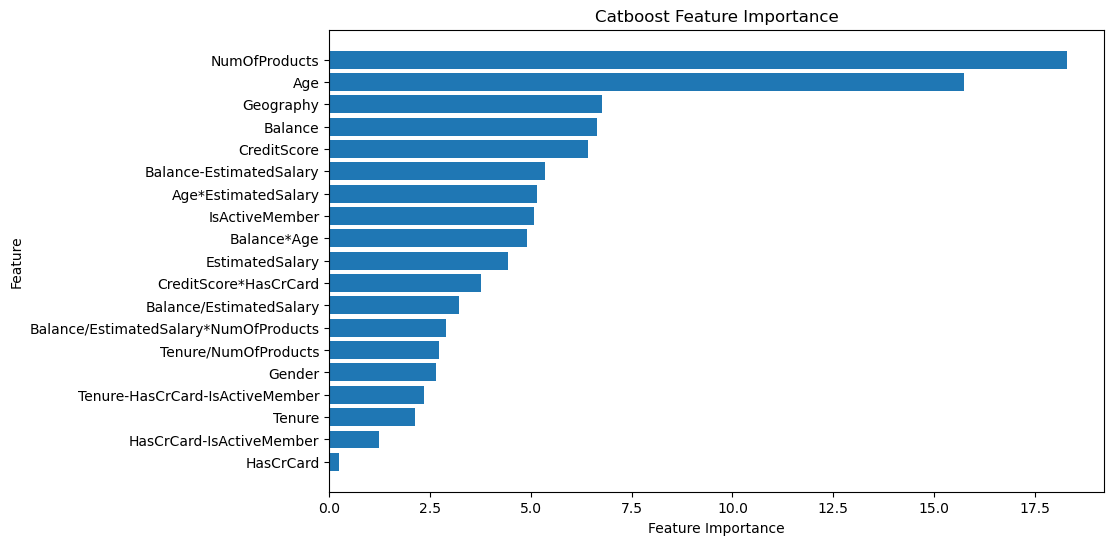

In [44]:
# 시각화

plt.figure(figsize=(10, 6))
sorted_indices = m_cb.feature_importances_.argsort()  # 변수 중요도를 오름차순으로 정렬한 인덱스
plt.barh(range(len(m_cb.feature_importances_)), m_cb.feature_importances_[sorted_indices], align='center')
plt.yticks(range(len(m_cb.feature_importances_)), churn_cat_x.columns[sorted_indices])  # 열 이름을 y축에 표시
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Catboost Feature Importance')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

catboost_probs_tr = m_cb.predict_proba(train_x)[:, 1]
catboost_probs_te = m_cb.predict_proba(test_x)[:, 1]

# AUC 계산
catboost_auc_tr = roc_auc_score(train_y, catboost_probs_tr)   # 95.93
catboost_auc_te = roc_auc_score(test_y, catboost_probs_te)    # 86.58
print(catboost_auc_tr)
print(catboost_auc_te)

0.9593262632563943
0.8657895511983424
